In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
data=tf.keras.datasets.mnist


In [3]:
(x_train,y_train),(x_test,y_test)=data.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train=x_train/255
x_test=x_test/255

In [6]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [8]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6365 - accuracy: 0.8398 - val_loss: 0.3586 - val_accuracy: 0.9026
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3373 - accuracy: 0.9059 - val_loss: 0.2965 - val_accuracy: 0.9185
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2897 - accuracy: 0.9186 - val_loss: 0.2611 - val_accuracy: 0.9249


In [9]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2611 - accuracy: 0.9249


In [17]:
print(test_loss,test_acc)

0.2611144185066223 0.9248999953269958


<function matplotlib.pyplot.show(close=None, block=None)>

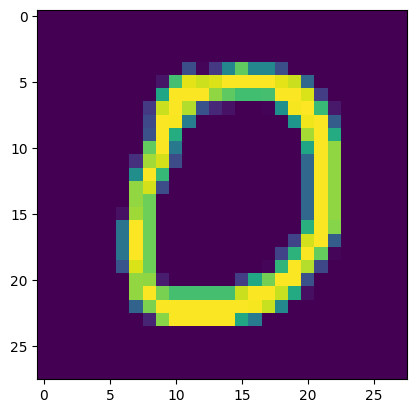

In [19]:
import matplotlib.pyplot as plt

plt.imshow(x_test[10])
plt.show

313/313 [==============================] - 1s 4ms/step
0


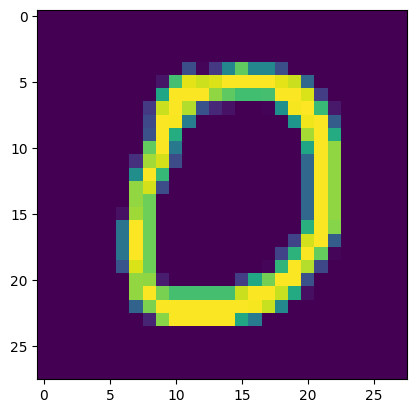

In [29]:
import numpy as np
predicta=model.predict(x_test)
plt.imshow(x_test[10])
print(np.argmax(predicta[10]))
plt.show()


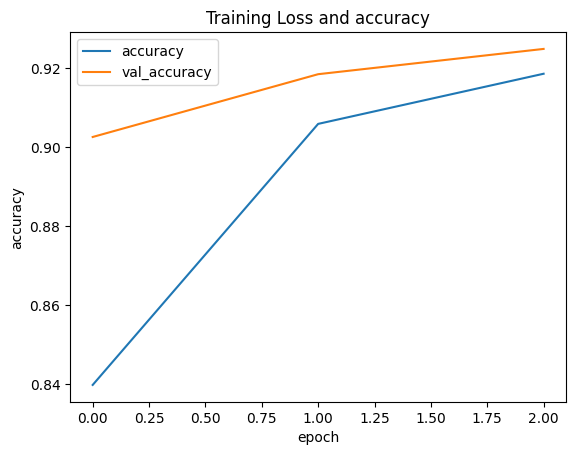

In [31]:
# graph represents the model’s loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

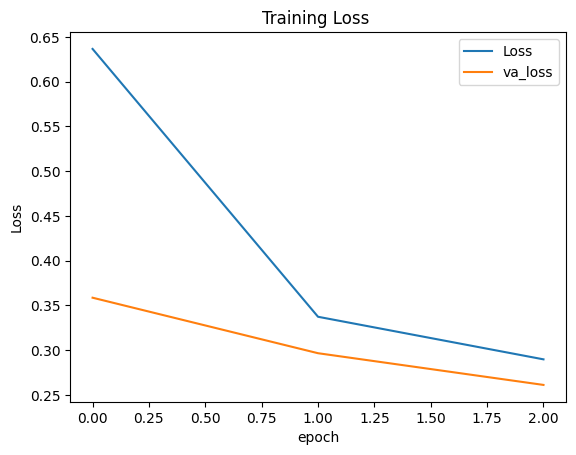

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss ')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'va_loss'])
plt.show()